<div>
<center>
  <img src="https://raw.githubusercontent.com/prasanna-muppidwar/Cool-Notebooks/main/Machine%20Learning%20Notebooks/ML%20Nagpur.png" alt="ML Nagpur" height="80">
  </center>
</div>

# ***Template to Categorise Data From Single Feature Using NLTK***


**Coded By:** Prasanna Muppidwar

**Last Update:** 2023-12-2


**Problem Statement -** Many time we data which should be classified into categories to build various product recommendation system ,etc but fails to get so. Here its a basic implementation to extract data with the help of NLP and Unsupervised Learning techniques.



In [46]:
#importing necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


In [47]:
df=pd.read_csv("/content/All Sports Fitness and Outdoors.csv")

In [48]:
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Campus Men's OXYFIT (N) Walking Shoe,sports & fitness,"All Sports, Fitness & Outdoors",https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Campus-OXYFIT-Walking-Sh...,4.1,"30,227",₹648,₹999
1,SPOKOFIT Finger Gripper Strength Trainer Forea...,sports & fitness,"All Sports, Fitness & Outdoors",https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/SPOKOFIT-Strength-Exerci...,3.5,50,₹129,₹699
2,Baggit Women's PEPSI Sling Bag,sports & fitness,"All Sports, Fitness & Outdoors",https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Baggit-Womens-Hobo-Handb...,4.3,"2,065",₹649,"₹1,599"
3,Lista Lista002 Bicycle Silicone Saddle Seat an...,sports & fitness,"All Sports, Fitness & Outdoors",https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Quality-Bicycle-Silicone...,3.6,"6,580",₹205,₹999
4,Amazon Brand - Solimo Pre-Seasoned Cast Iron D...,sports & fitness,"All Sports, Fitness & Outdoors",https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Amazon-Brand-Solimo-Pre-...,3.9,"3,890",₹899,"₹1,800"


In [49]:
# Dropping extra features
columns_to_drop = ['link', 'ratings', 'no_of_ratings', 'discount_price',]
df.drop(columns_to_drop, axis=1, inplace=True)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1224 non-null   object
 1   main_category  1224 non-null   object
 2   sub_category   1224 non-null   object
 3   image          1224 non-null   object
 4   actual_price   1220 non-null   object
dtypes: object(5)
memory usage: 47.9+ KB


In [51]:
# Removing symbol and convert price column to numeric
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)


In [52]:
X = df.iloc[:, [0,1,2]].values
Y = df.iloc[:,[4]].values

In [53]:
# Selecting the numeric columns for clustering
columns_for_clustering = ['main_category', 'sub_category', 'actual_price']
X_numeric = df[columns_for_clustering]


In [54]:

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def filter_nouns(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    nouns = [token for token, pos in tagged_tokens if pos.startswith('NN')]
    return ' '.join(nouns)

df['filtered_name'] = df['name'].apply(filter_nouns)


filtered_df = df[['filtered_name', 'main_category', 'sub_category', 'actual_price']]

print(filtered_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


                                          filtered_name     main_category  \
0                      Campus Men OXYFIT N Walking Shoe  sports & fitness   
1     SPOKOFIT Finger Gripper Strength Trainer Forea...  sports & fitness   
2                          Baggit Women PEPSI Sling Bag  sports & fitness   
3     Lista Lista002 Bicycle Silicone Saddle Seat Cy...  sports & fitness   
4     Amazon Brand Solimo Cast Iron Dosa Tawa Inches...  sports & fitness   
...                                                 ...               ...   
1219  Cougar Dual Action Pump Football Volleyball Ba...  sports & fitness   
1220  GJSHOP Full Body Workout Exerciser Revolex Xtr...  sports & fitness   
1221  Hero Growler MTB Hybrid Geared Cycle | Speed S...  sports & fitness   
1222  Puma Womens Trackracer WN Purple Charcoal-Isla...  sports & fitness   
1223  Wheel Wave Board Degree Colorful LED Wheels Ki...  sports & fitness   

                        sub_category  actual_price  
0     All Sports, Fitn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


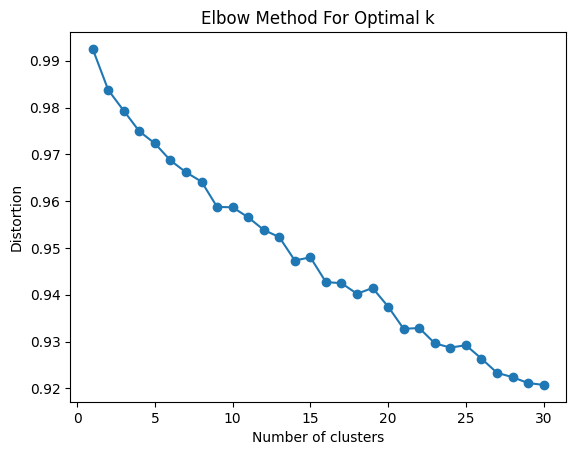

In [55]:

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['filtered_name'])


# Function to calculate the distortion (inertia) for different values of k
def calculate_distortion(data, kmax):
    distortions = []
    K = range(1, kmax + 1)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(sum(np.min(cdist(data.toarray(), kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

    return distortions

# Choose a reasonable range for k (e.g., up to 30 clusters)
max_k = 30
distortions = calculate_distortion(tfidf_matrix, max_k)

# Plot the elbow graph
plt.plot(range(1, max_k + 1), distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()



In [56]:
# Based on the elbow plot, manually select the optimal k
optimal_k = 30

# Now, perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add the cluster information to the original DataFrame
df['cluster'] = clusters
clustered_df = df[['filtered_name', 'main_category', 'sub_category', 'actual_price', 'cluster']]

print(clustered_df)


                                          filtered_name     main_category  \
0                      Campus Men OXYFIT N Walking Shoe  sports & fitness   
1     SPOKOFIT Finger Gripper Strength Trainer Forea...  sports & fitness   
2                          Baggit Women PEPSI Sling Bag  sports & fitness   
3     Lista Lista002 Bicycle Silicone Saddle Seat Cy...  sports & fitness   
4     Amazon Brand Solimo Cast Iron Dosa Tawa Inches...  sports & fitness   
...                                                 ...               ...   
1219  Cougar Dual Action Pump Football Volleyball Ba...  sports & fitness   
1220  GJSHOP Full Body Workout Exerciser Revolex Xtr...  sports & fitness   
1221  Hero Growler MTB Hybrid Geared Cycle | Speed S...  sports & fitness   
1222  Puma Womens Trackracer WN Purple Charcoal-Isla...  sports & fitness   
1223  Wheel Wave Board Degree Colorful LED Wheels Ki...  sports & fitness   

                        sub_category  actual_price  cluster  
0     All Spo

In [57]:

cluster_items = {}

for cluster_num, group in df.groupby('cluster'):
    items = group['filtered_name'].tolist()
    details = group[['main_category', 'sub_category', 'actual_price']].values.tolist()
    cluster_items[f'Cluster {cluster_num}'] = {'items': items, 'details': details}


result_df = pd.DataFrame(cluster_items).T
print(result_df)


                                                        items  \
Cluster 0   [Tynor Knee Cap Air Pro Black Orange Medium Pa...   
Cluster 1   [ASIAN Women Elasto-02 Knitted Sports Walking ...   
Cluster 2   [FitBox Exlusive Octa PVC Dumbbells Black, RUB...   
Cluster 3   [BLINKIN Stretchable Yoga Pants Women Gym Pant...   
Cluster 4   [Yonex ZR Light Aluminium Badminton Racquet Fu...   
Cluster 5   [Volatility Russia Hand Stich Football Size-05...   
Cluster 6   [Baggit Women PEPSI Sling Bag, SFANE Polyester...   
Cluster 7   [Women Sports Shorts Workout Yoga Shorts Pant/...   
Cluster 8   [Adult Cotton Caps Pack, Maniac Men Cargo Blac...   
Cluster 9   [Slovic Pull-Up Bar Home Workout | Non-Slip Ca...   
Cluster 10  [Adidas Mens Running Shoe, Bourge Mens Loire-z...   
Cluster 11  [DSC Zoooter Cricket Shoes Cricket Shoes, pc T...   
Cluster 12  [Pro-Biker Motorcycle Bike Racing Riding Glove...   
Cluster 13  [JAZAA Bucket Hat Women Men Teens Reversible S...   
Cluster 14  [Gadget Deals

In [59]:
from collections import Counter

cluster_rows = []

for cluster_num, group in df.groupby('cluster'):
    items = group['filtered_name'].tolist()
    details = group[['main_category', 'sub_category', 'actual_price']].values.tolist()
    cluster_rows.extend([(f'Cluster {cluster_num}', item, *detail) for item, detail in zip(items, details)])


result_df = pd.DataFrame(cluster_rows, columns=['Cluster', 'Product', 'Main Category', 'Sub Category', 'Actual Price'])

def generate_cluster_name(product_names):
    words = ' '.join(product_names).split()
    word_counts = Counter(words)
    most_common_word = word_counts.most_common(1)[0][0]
    return most_common_word

cluster_names = {}
for cluster_num, group in result_df.groupby('Cluster'):
    product_names = group['Product'].tolist()
    cluster_name = generate_cluster_name(product_names)
    cluster_names[cluster_num] = cluster_name

result_df['Cluster'] = result_df['Cluster'].map(cluster_names)

result_df.to_csv('sports.csv', index=False)
print('CSV Saved Successfully!')


CSV Saved Successfully


In [60]:
da=pd.read_csv('/content/sports.csv')

In [61]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cluster        1224 non-null   object 
 1   Product        1224 non-null   object 
 2   Main Category  1224 non-null   object 
 3   Sub Category   1224 non-null   object 
 4   Actual Price   1220 non-null   float64
dtypes: float64(1), object(4)
memory usage: 47.9+ KB


In [62]:
da.head()

,Cluster,Product,Main Category,Sub Category,Actual Price
0,Cap,Tynor Knee Cap Air Pro Black Orange Medium Pack,sports & fitness,"All Sports, Fitness & Outdoors",399.0
1,Cap,Boldfit Winter Wear Women Winter Cap Men Woole...,sports & fitness,"All Sports, Fitness & Outdoors",799.0
2,Cap,Jack Jones Men Cap Denim_Blue Free Size,sports & fitness,"All Sports, Fitness & Outdoors",799.0
3,Cap,TYNOR Knee cap Men Women Knee Sleeve Pain Relief,sports & fitness,"All Sports, Fitness & Outdoors",347.0
4,Cap,Ventewa Spain Unisex Wool Blend Artist Beret Cap,sports & fitness,"All Sports, Fitness & Outdoors",999.0
